In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd. read_csv("Questão 1 - Base.txt", sep="\t")

In [ ]:
df.index = pd.to_datetime(df['DT_VENCIMENTO'], infer_datetime_format=True)


In [ ]:
# tranforma a coluna DT_VENCIMENTO em index do dataset
df_dtime = df.index


In [ ]:
# Exclui a columa(variavel) DT_VENCIMENTO, pois agora ela é o index
df.drop(columns = ['DT_VENCIMENTO'], inplace = True)

In [ ]:
# Converte a variável DS_ROLAGEM em texto(string)
df['DS_ROLAGEM'] = df['DS_ROLAGEM'].astype(str)

In [ ]:
# Filtra dados dos meses, exceto setembro (sem setembro)
df_ss = df[df.index.month != 9]

In [ ]:
# Filta os dados em relação à variável DS_ROLAGEM
df_ss_fx0 = df_ss.DS_ROLAGEM == 'FX0'
df_ss_fx1 = df_ss.DS_ROLAGEM == 'FX1'
df_ss_fx0 = df_ss[df_ss_fx0]
df_ss_fx1 = df_ss[df_ss_fx1]

In [ ]:

g = df_ss.groupby(df_ss.index.month) # Total geral
gfx0 = df_ss_fx0.groupby(df_ss_fx0.index.month) # Total de faturas pagas
gfx1 = df_ss_fx1.groupby(df_ss_fx1.index.month) # Total de faturas não pagas

total = g.count()

In [ ]:
# as variáveis fxX_percent_mes com tem os percentuais de faturas pagas(FX0) e nao Pagas(FX1).

fx0_percent_mes = gfx0.DS_ROLAGEM.count()/total.DS_ROLAGEM*100

fx1_percent_mes = pd.DataFrame(gfx1.DS_ROLAGEM.count()/ total.DS_ROLAGEM*100)
fx1_percent_mes.rename(columns = {'DS_ROLAGEM':'Porcentagem'}, inplace = True)
fx1_percent_mes.index.rename('Mes', inplace = True)
fx1_percent_mes

,Porcentagem
Mes,
1,7.286611
2,8.898547
3,10.878634
4,8.394800
5,10.044556
6,8.534790
7,9.613888
8,9.063069


# QUESTÃO
## 1.1 – Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior?
## Resposta:
## Quando a variável RS_ROLAGEM tem valor FX1, foi o més no qual os clientes não pagaram a fatura anterior, entao faz-se a contagem mês a mês. 

Text(0.5, 1.0, 'Valor total de porcentagem de cada mês')

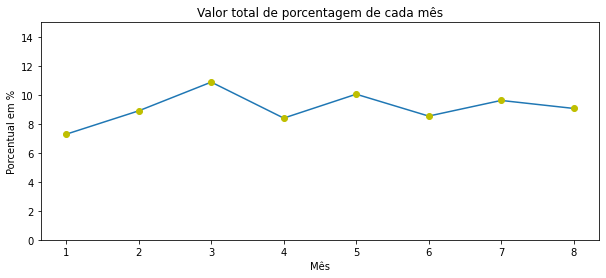

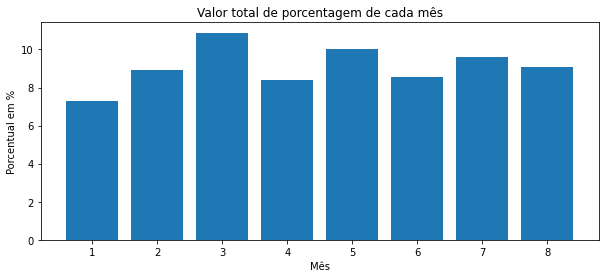

In [ ]:
# um Gráfico mostrando o pedido na questão e mais a baixo os dados impressos
plt.figure(figsize=(10,4))
plt.plot(fx1_percent_mes)
plt.plot(fx1_percent_mes,'yo')
plt.ylim(0,15) # 
plt.xlabel('Mês')
plt.ylabel('Porcentual em %')
plt.title('Valor total de porcentagem de cada mês')

plt.figure(figsize=(10,4))
plt.bar(fx1_percent_mes.index,fx1_percent_mes.Porcentagem )
plt.xlabel('Mês')
plt.ylabel('Porcentual em %')
plt.title('Valor total de porcentagem de cada mês')

In [ ]:
print('\nRepresentação em tabela.\n')
print(fx1_percent_mes.to_markdown())


Representação em tabela.

|   Mes |   Porcentagem |
|------:|--------------:|
|     1 |       7.28661 |
|     2 |       8.89855 |
|     3 |      10.8786  |
|     4 |       8.3948  |
|     5 |      10.0446  |
|     6 |       8.53479 |
|     7 |       9.61389 |
|     8 |       9.06307 |


## Questao 1.2
#### 1.2 – Tendo como referência todos os clientes que tiveram fatura emitida no mês de setembro, gere uma base para esses clientes com os seguintes calculados:
#### • Total de faturas emitidas nos últimos 6 meses (sem contar com a fatura de setembro);
#### • O valor médio de fatura nos últimos 6 meses (sem contar com a fatura de setembro);
#### • Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro). 
 


##  Base de dados completa

In [ ]:
df.head()

,ID_CONTA,DS_ROLAGEM,VL_FATURA
DT_VENCIMENTO,,,
2019-01-01,402467,FX0,210.00
2019-01-01,403001,FX1,1097.18
2019-01-01,403499,FX0,1209.88
2019-01-01,403670,FX0,667.40
2019-01-01,404183,FX1,1239.52


In [ ]:
# Itera nos seis meses anteriores á setembro, de março(3) até agosto(8) e soma.
contagem_faturas = 0
# ultimos seis meses começando em agosto até março
for i in range(3,9):
    mes = df[df.index.month == i]
    qtd_mes = mes.count().VL_FATURA
    contagem_faturas = contagem_faturas + qtd_mes

    
# segue abaixo outra forma de seleção dos ultimos seis meses


## • Total de faturas emitidas nos últimos 6 meses (sem contar com a fatura de setembro);

## • O valor médio de fatura nos últimos 6 meses (sem contar com a fatura de setembro);

In [ ]:
# o index é a data portanto selecionar os meses 3 à 9 de um dataframe
# ou seja, em um intervalo de meses.
meses = df[(df.index.month > 2) & (df.index.month <9) ]
qtd_faturas_ult6meses = meses.groupby(meses.ID_CONTA).count().DS_ROLAGEM

In [ ]:
# resume a contagem simples de faturas dos ultimos 6 meses para cada conta
meses['QTD_FATURAS_ULT6MESES'] = meses[["ID_CONTA"]].groupby(meses.ID_CONTA).transform('count')

<ipython-input-178-00bd23a56a15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meses['QTD_FATURAS_ULT6MESES'] = meses[["ID_CONTA"]].groupby(meses.ID_CONTA).transform('count')


In [ ]:
# resume o valor médio de faturas dos ultimos 6 meses para cada conta
meses['VL_MEDIO_FATURA']   =  meses["VL_FATURA"].groupby(meses.ID_CONTA).transform("mean")

<ipython-input-179-f55e005b454b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meses['VL_MEDIO_FATURA']   =  meses["VL_FATURA"].groupby(meses.ID_CONTA).transform("mean")


#### RESPOSTAS dos dois itens anteriores, as colunas QTD_FATURAS_ULT6MESES e VL_MEDIO_FATURA respectivamente

In [ ]:
meses.index = meses.ID_CONTA
meses.index.rename('ID', inplace=True)

meses = meses.drop_duplicates(subset = ["ID_CONTA"])

In [ ]:
meses

,ID_CONTA,DS_ROLAGEM,VL_FATURA,QTD_FATURAS_ULT6MESES,VL_MEDIO_FATURA
ID,,,,,
1624902,1624902,FX0,226.62,4,424.060000
1624908,1624908,FX0,921.09,6,1188.201667
1624916,1624916,FX0,1456.75,6,686.988333
1624951,1624951,FX0,70.11,6,179.858333
1624975,1624975,FX0,49.05,4,82.590000
...,...,...,...,...,...
1706813,1706813,FX0,78.77,1,78.770000
1706815,1706815,FX0,378.37,1,378.370000
1706817,1706817,FX0,175.78,1,175.780000


Text(0.5, 1.0, 'Número de fatura dos ultimos 6 meses.')

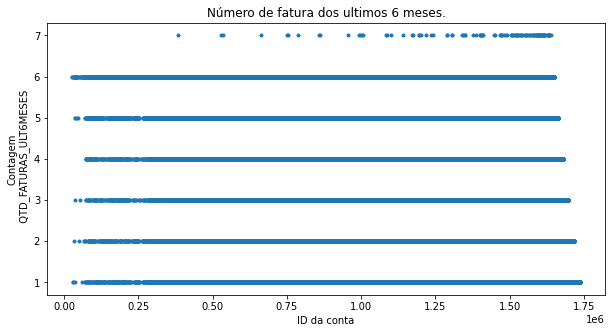

In [ ]:
plt.figure(figsize=(10,5))#figsize=(15,5)
plt.plot(meses.iloc[:,3],'.') #Coluna de contagem
plt.xlabel('ID da conta')
plt.ylabel('Contagem\n  QTD_FATURAS_ULT6MESES')
plt.title('Número de fatura dos ultimos 6 meses.')

Text(0.5, 1.0, 'Valor médio de faturas de cada conta.')

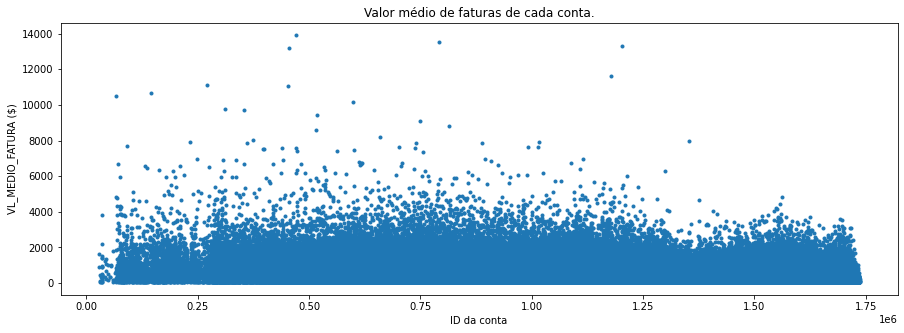

In [ ]:
##### plt.figure()
plt.figure(figsize=(15,5))
plt.plot(meses.iloc[:,4],'.') #Coluna valores médios
plt.xlabel('ID da conta')
plt.ylabel('VL_MEDIO_FATURA ($)')
plt.title('Valor médio de faturas de cada conta.')

## • Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro).

In [ ]:
# Novamente usa-se a seleção de internvalo de meses anterior está na variável meses
# contendo dados dos ultimos seis meses, em que a variável DS_ROLAGEM na base de dados
# contiver o valor FX1 quer dizer que nao foi paga a ultima fatura.
# faz-se uma contagem de ocorrencia de FX1.
meses = meses.drop_duplicates(subset=['ID_CONTA'])
meses

,ID_CONTA,DS_ROLAGEM,VL_FATURA,QTD_FATURAS_ULT6MESES,VL_MEDIO_FATURA
ID,,,,,
1624902,1624902,FX0,226.62,4,424.060000
1624908,1624908,FX0,921.09,6,1188.201667
1624916,1624916,FX0,1456.75,6,686.988333
1624951,1624951,FX0,70.11,6,179.858333
1624975,1624975,FX0,49.05,4,82.590000
...,...,...,...,...,...
1706813,1706813,FX0,78.77,1,78.770000
1706815,1706815,FX0,378.37,1,378.370000
1706817,1706817,FX0,175.78,1,175.780000


In [ ]:
# resume a quantidade de faturas que o cliente nao pagou nos ultimos seis meses, para cada conta
#meses['QTD_FATURAS_ULT_6M_FX1'] = meses[(meses.DS_ROLAGEM == 'FX1')][['DS_ROLAGEM','ID_CONTA']].groupby(['ID_CONTA']).transform('count')

#meses.index = meses.ID_CONTA
#meses.drop('ID_CONTA',axis=1, inplace=True)
meses = df[(df.index.month > 2) & (df.index.month <9) ]

meses.index = meses.ID_CONTA
meses.index.rename('ID', inplace=True)

qtd_fx1 = meses[(meses.DS_ROLAGEM == 'FX1')][['DS_ROLAGEM','ID_CONTA']].groupby(['ID_CONTA']).transform('count')
qtd_fx1.rename(columns = {'DS_ROLAGEM': 'QTD_FATURAS_ULT_6M_FX1'},inplace = True)
#qtd_fx1

In [ ]:
qtd_fx1

,QTD_FATURAS_ULT_6M_FX1
ID,
1625050,1
1625077,1
1625166,3
1685104,1
1685153,1
...,...
1670992,1
1671001,1
1624754,3


In [ ]:
qtd_fx1['ID_CONTA'] = qtd_fx1.index
qtd_fx1 = qtd_fx1.drop_duplicates(subset = ["ID_CONTA"])
qtd_fx1.reset_index()

,ID,QTD_FATURAS_ULT_6M_FX1,ID_CONTA
0,1625050,1,1625050
1,1625077,1,1625077
2,1625166,3,1625166
3,1685104,1,1685104
4,1685153,1,1685153
...,...,...,...
135258,1670871,1,1670871
135259,1670913,1,1670913
135260,1670992,1,1670992
135261,1671001,1,1671001


Text(0.5, 1.0, 'Número de faturas não foi paga de cada conta\n nos ultimos seis meses, exceto setembro.')

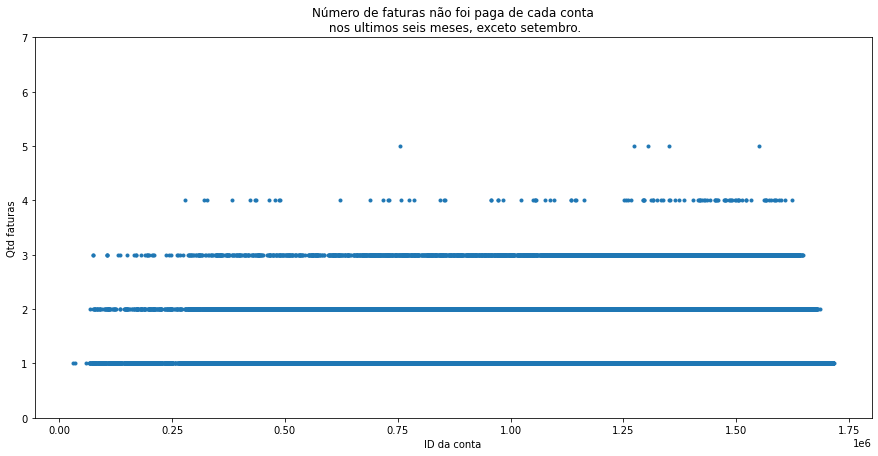

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(qtd_fx1.iloc[:,1], qtd_fx1.QTD_FATURAS_ULT_6M_FX1 , '.')
plt.ylim(0,7)
plt.xlabel('ID da conta')
plt.ylabel('Qtd faturas')
plt.title('Número de faturas não foi paga de cada conta\n nos ultimos seis meses, exceto setembro.')